# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Devita Ayu Maharani
- **Email:** mdevita303@gmail.com
- **ID Dicoding:** devita_am

## Menentukan Pertanyaan Bisnis

- Bagaimana pola penggunaan sepeda selama dua tahun?
- Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?
- Bagaimana tren penyewaan sepeda selama hari-hari libur dibandingkan hari kerja?

## Import Semua Packages/Library yang Digunakan

In [43]:
from google.colab import drive
drive.mount('/content/drive')

# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Wrangling

### Gathering Data

In [44]:
# Readme Dataset
file_path = '/content/drive/MyDrive/MyDataset/Bike-sharing-dataset/Readme.txt'

with open(file_path, 'r') as file:
    content = file.read()

print(content)

Bike Sharing Dataset

Hadi Fanaee-T

Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto
INESC Porto, Campus da FEUP
Rua Dr. Roberto Frias, 378
4200 - 465 Porto, Portugal


Background 

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return 
back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return 
back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of 
over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, 
environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by
these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration
of tra

In [45]:
df_hour = pd.read_csv('/content/drive/MyDrive/MyDataset/Bike-sharing-dataset/hour.csv')
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [46]:
df_day = pd.read_csv('/content/drive/MyDrive/MyDataset/Bike-sharing-dataset/day.csv')
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Bike Sharing Dataset mengandung data dari hal-hal yang dapat memengaruhi peminjaman sepeda mulai dari kondisi cuaca, musim, waktu dan tanggal.
- Data terbagi menjadi data per jam (hourly basis) dan data per hari (daily basis) yang terbagi menjadi file data berikut.<br>
 * hour.csv
 * day.csv
 * Readme.txt
- Data ini diambil pada tahun 2011 - 2012 dari Capital Bikeshare system, Washington D.C., USA

### Assessing Data

In [47]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Menilai tabel df_hour

In [48]:
# Menilai tabel df_hour
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [49]:
print("Jumlah duplikasi: ", df_hour.duplicated().sum())
print("Data null:")
df_hour.isna().sum()

Jumlah duplikasi:  0
Data null:


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [50]:
df_hour.describe().round(2)

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.00,17379.00,17379.0,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00
mean,8690.00,2.50,0.5,6.54,11.55,0.03,3.00,0.68,1.43,0.50,0.48,0.63,0.19,35.68,153.79,189.46
std,5017.03,1.11,0.5,3.44,6.91,0.17,2.01,0.47,0.64,0.19,0.17,0.19,0.12,49.31,151.36,181.39
min,1.00,1.00,0.0,1.00,0.00,0.00,0.00,0.00,1.00,0.02,0.00,0.00,0.00,0.00,0.00,1.00
25%,4345.50,2.00,0.0,4.00,6.00,0.00,1.00,0.00,1.00,0.34,0.33,0.48,0.10,4.00,34.00,40.00
50%,8690.00,3.00,1.0,7.00,12.00,0.00,3.00,1.00,1.00,0.50,0.48,0.63,0.19,17.00,115.00,142.00
75%,13034.50,3.00,1.0,10.00,18.00,0.00,5.00,1.00,2.00,0.66,0.62,0.78,0.25,48.00,220.00,281.00
max,17379.00,4.00,1.0,12.00,23.00,1.00,6.00,1.00,4.00,1.00,1.00,1.00,0.85,367.00,886.00,977.00


#### Menilai tabel df_day

In [51]:
# Menilai tabel df_day
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [52]:
print("Jumlah duplikasi: ", df_day.duplicated().sum())
print("Data null:")
df_day.isna().sum()

Jumlah duplikasi:  0
Data null:


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [53]:
df_day.describe().round(2)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.00,731.00,731.0,731.00,731.00,731.0,731.00,731.00,731.00,731.00,731.00,731.00,731.00,731.00,731.00
mean,366.00,2.50,0.5,6.52,0.03,3.0,0.68,1.40,0.50,0.47,0.63,0.19,848.18,3656.17,4504.35
std,211.17,1.11,0.5,3.45,0.17,2.0,0.47,0.54,0.18,0.16,0.14,0.08,686.62,1560.26,1937.21
min,1.00,1.00,0.0,1.00,0.00,0.0,0.00,1.00,0.06,0.08,0.00,0.02,2.00,20.00,22.00
25%,183.50,2.00,0.0,4.00,0.00,1.0,0.00,1.00,0.34,0.34,0.52,0.13,315.50,2497.00,3152.00
50%,366.00,3.00,1.0,7.00,0.00,3.0,1.00,1.00,0.50,0.49,0.63,0.18,713.00,3662.00,4548.00
75%,548.50,3.00,1.0,10.00,0.00,5.0,1.00,2.00,0.66,0.61,0.73,0.23,1096.00,4776.50,5956.00
max,731.00,4.00,1.0,12.00,1.00,6.0,1.00,3.00,0.86,0.84,0.97,0.51,3410.00,6946.00,8714.00


**Insight:**
- **Jumlah data**:
 - df_hour: 17379 baris, 16 kolom
 - df_day: 731 baris, 15 kolom
- **Missing value**: Tidak ada
- **Duplicate data**: Tidak ada
- **Invalid/Inaccurate value**: Tidak ada
- Dataset sudah clean
- Tipe data dteday sebaiknya diubah ke datetime
- weathersit dan season sebaiknya diubah ke bentuk string (encoding)
- kolom insight sebaiknya di-_drop_ karena sudah ada index pada library pandas
- header tabel sebaiknya di-_rename_ agar lebih mudah pada proses analisis

### Cleaning Data

#### Mengubah Tipe Data ```dteday```

In [54]:
# tabel df_hour
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])
print(df_hour.dtypes)
df_hour.head()

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [55]:
# tabel df_day
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
print(df_day.dtypes)
df_day.head()

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Encoding Weathersit

In [56]:
# tabel df_hour
df_hour['weathersit'] = df_hour['weathersit'].replace({
    1: 'Clear/Few Cloudy',
    2: 'Mist/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Heavy Snow/Rain'
})

print("Tipe data weathersit: ", df_hour['weathersit'].dtypes)
df_hour.head()

Tipe data weathersit:  object


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,Clear/Few Cloudy,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,Clear/Few Cloudy,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,Clear/Few Cloudy,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,Clear/Few Cloudy,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,Clear/Few Cloudy,0.24,0.2879,0.75,0.0,0,1,1


In [57]:
# tabel df_day
df_day['weathersit'] = df_day['weathersit'].replace({
    1: 'Clear/Few Cloudy',
    2: 'Mist/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Heavy Snow/Rain'
})

print("Tipe data weathersit: ", df_day['weathersit'].dtypes)
df_day.head()

Tipe data weathersit:  object


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,Mist/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,Mist/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,Clear/Few Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,Clear/Few Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,Clear/Few Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Encoding Season

In [58]:
# tabel df_hour
df_hour['season'] = df_hour['season'].replace({
    1: 'Springer',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
})

print("Tipe data season: ", df_hour['season'].dtypes)
df_hour.head()

Tipe data season:  object


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Springer,0,1,0,0,6,0,Clear/Few Cloudy,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Springer,0,1,1,0,6,0,Clear/Few Cloudy,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Springer,0,1,2,0,6,0,Clear/Few Cloudy,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Springer,0,1,3,0,6,0,Clear/Few Cloudy,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Springer,0,1,4,0,6,0,Clear/Few Cloudy,0.24,0.2879,0.75,0.0,0,1,1


In [59]:
# tabel df_day
df_day['season'] = df_day['season'].replace({
    1: 'Springer',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
})

print("Tipe data season: ", df_day['season'].dtypes)
df_day.head()

Tipe data season:  object


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Springer,0,1,0,6,0,Mist/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Springer,0,1,0,0,0,Mist/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Springer,0,1,0,1,1,Clear/Few Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Springer,0,1,0,2,1,Clear/Few Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Springer,0,1,0,3,1,Clear/Few Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Drop ```instant```

In [60]:
# tabel df_hour
df_hour = df_hour.drop(columns=['instant'])
df_hour.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Springer,0,1,0,0,6,0,Clear/Few Cloudy,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Springer,0,1,1,0,6,0,Clear/Few Cloudy,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Springer,0,1,2,0,6,0,Clear/Few Cloudy,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Springer,0,1,3,0,6,0,Clear/Few Cloudy,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Springer,0,1,4,0,6,0,Clear/Few Cloudy,0.24,0.2879,0.75,0.0,0,1,1


In [61]:
# tabel df_day
df_day = df_day.drop(columns=['instant'])
df_day.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Springer,0,1,0,6,0,Mist/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,Springer,0,1,0,0,0,Mist/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,Springer,0,1,0,1,1,Clear/Few Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,Springer,0,1,0,2,1,Clear/Few Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,Springer,0,1,0,3,1,Clear/Few Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Rename header tabel

In [62]:
# tabel df_hour
df_hour = df_hour.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'hr': 'hour',
    'weathersit': 'weather_condition',
    'temp': 'temperature',
    'atemp': 'temperature_feeling',
    'hum': 'humidity',
    'cnt': 'total_rented'
})
df_hour.head()

,date,season,year,month,hour,holiday,weekday,workingday,weather_condition,temperature,temperature_feeling,humidity,windspeed,casual,registered,total_rented
0,2011-01-01,Springer,0,1,0,0,6,0,Clear/Few Cloudy,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Springer,0,1,1,0,6,0,Clear/Few Cloudy,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Springer,0,1,2,0,6,0,Clear/Few Cloudy,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Springer,0,1,3,0,6,0,Clear/Few Cloudy,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Springer,0,1,4,0,6,0,Clear/Few Cloudy,0.24,0.2879,0.75,0.0,0,1,1


In [63]:
# tabel df_day
df_day = df_day.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_condition',
    'temp': 'temperature',
    'atemp': 'temperature_feeling',
    'hum': 'humidity',
    'cnt': 'total_rented'
})
df_day.head()

,date,season,year,month,holiday,weekday,workingday,weather_condition,temperature,temperature_feeling,humidity,windspeed,casual,registered,total_rented
0,2011-01-01,Springer,0,1,0,6,0,Mist/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,Springer,0,1,0,0,0,Mist/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,Springer,0,1,0,1,1,Clear/Few Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,Springer,0,1,0,2,1,Clear/Few Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,Springer,0,1,0,3,1,Clear/Few Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Data telah clean dan lebih mudah digunakan dalam analisis

## Exploratory Data Analysis (EDA)

### Explore df_hour dan df_day

In [64]:
df_hour.describe(include="all").round(2)

,date,season,year,month,hour,holiday,weekday,workingday,weather_condition,temperature,temperature_feeling,humidity,windspeed,casual,registered,total_rented
count,17379,17379,17379.0,17379.00,17379.00,17379.00,17379.00,17379.00,17379,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00
unique,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Fall,NaN,NaN,NaN,NaN,NaN,NaN,Clear/Few Cloudy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4496,NaN,NaN,NaN,NaN,NaN,NaN,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-02 04:08:34.552045568,NaN,0.5,6.54,11.55,0.03,3.00,0.68,NaN,0.50,0.48,0.63,0.19,35.68,153.79,189.46
min,2011-01-01 00:00:00,NaN,0.0,1.00,0.00,0.00,0.00,0.00,NaN,0.02,0.00,0.00,0.00,0.00,0.00,1.00
25%,2011-07-04 00:00:00,NaN,0.0,4.00,6.00,0.00,1.00,0.00,NaN,0.34,0.33,0.48,0.10,4.00,34.00,40.00
50%,2012-01-02 00:00:00,NaN,1.0,7.00,12.00,0.00,3.00,1.00,NaN,0.50,0.48,0.63,0.19,17.00,115.00,142.00
75%,2012-07-02 00:00:00,NaN,1.0,10.00,18.00,0.00,5.00,1.00,NaN,0.66,0.62,0.78,0.25,48.00,220.00,281.00
max,2012-12-31 00:00:00,NaN,1.0,12.00,23.00,1.00,6.00,1.00,NaN,1.00,1.00,1.00,0.85,367.00,886.00,977.00


In [65]:
df_day.describe(include="all").round(2)

,date,season,year,month,holiday,weekday,workingday,weather_condition,temperature,temperature_feeling,humidity,windspeed,casual,registered,total_rented
count,731,731,731.0,731.00,731.00,731.0,731.00,731,731.00,731.00,731.00,731.00,731.00,731.00,731.00
unique,NaN,4,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Fall,NaN,NaN,NaN,NaN,NaN,Clear/Few Cloudy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,188,NaN,NaN,NaN,NaN,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-01 00:00:00,NaN,0.5,6.52,0.03,3.0,0.68,NaN,0.50,0.47,0.63,0.19,848.18,3656.17,4504.35
min,2011-01-01 00:00:00,NaN,0.0,1.00,0.00,0.0,0.00,NaN,0.06,0.08,0.00,0.02,2.00,20.00,22.00
25%,2011-07-02 12:00:00,NaN,0.0,4.00,0.00,1.0,0.00,NaN,0.34,0.34,0.52,0.13,315.50,2497.00,3152.00
50%,2012-01-01 00:00:00,NaN,1.0,7.00,0.00,3.0,1.00,NaN,0.50,0.49,0.63,0.18,713.00,3662.00,4548.00
75%,2012-07-01 12:00:00,NaN,1.0,10.00,0.00,5.0,1.00,NaN,0.66,0.61,0.73,0.23,1096.00,4776.50,5956.00
max,2012-12-31 00:00:00,NaN,1.0,12.00,1.00,6.0,1.00,NaN,0.86,0.84,0.97,0.51,3410.00,6946.00,8714.00


### Pola penggunaan sepeda selama 1 tahun

In [66]:
# tabel df_hour
# musim
print("Bedasarkan Musim:")
df_hour_season_rented = df_hour.groupby(by='season').agg({'total_rented': ['sum','mean','min','max']}).sort_values(by=('total_rented','sum'), ascending=False).round(2).reset_index()
print(df_hour_season_rented)

# bulan
print("\nBedasarkan Bulan:")
df_hour_month_rented = df_hour.groupby(by='month').agg({'total_rented': ['sum','mean','min','max']}).sort_values(by=('total_rented','sum'), ascending=False).round(2).reset_index()
print(df_hour_month_rented)

# jam
print("\nBedasarkan Jam:")
df_hour_hours_rented = df_hour.groupby(by='hour').agg({'total_rented': ['sum','mean','min','max']}).sort_values(by=('total_rented','sum'), ascending=False).round(2).reset_index()
print(df_hour_hours_rented)

# jam per musim
df_hour_hours_season_rented = df_hour.groupby(by=['season', 'hour']).agg({'total_rented': ['sum','mean','min','max']}).sort_values(by=('total_rented','sum'), ascending=False).round(2).reset_index()
df_hour_hours_season_rented

Bedasarkan Musim:
     season total_rented                 
                     sum    mean min  max
0      Fall      1061129  236.02   1  977
1    Summer       918589  208.34   1  957
2    Winter       841613  198.87   1  967
3  Springer       471348  111.11   1  801

Bedasarkan Bulan:
   month total_rented                 
                  sum    mean min  max
0      8       351194  238.10   1  941
1      6       346342  240.52   1  900
2      9       345991  240.77   1  977
3      7       344948  231.82   1  913
4      5       331686  222.91   1  873
5     10       322352  222.16   1  963
6      4       269094  187.26   1  822
7     11       254831  177.34   1  729
8      3       228920  155.41   1  957
9     12       211036  142.30   1  759
10     2       151352  112.87   1  610
11     1       134933   94.42   1  559

Bedasarkan Jam:
   hour total_rented                 
                 sum    mean min  max
0    17       336860  461.45  15  976
1    18       309772  425.51  23  

season hour total_rented                 
                           sum    mean min  max
0       Fall   17       107562  572.14  16  976
1       Fall   18       102330  547.22  68  977
2     Summer   17        95468  518.85  15  957
3     Summer   18        88904  483.17  38  868
4     Winter   17        86050  486.16  31  967
..       ...  ...          ...     ...  ..  ...
91      Fall    4         1541    8.24   1   28
92    Winter    4         1279    7.27   1   21
93    Summer    4         1118    6.21   1   23
94  Springer    3         1108    7.10   1   66
95  Springer    4          490    3.18   1   22

[96 rows x 6 columns]

In [67]:
# tabel df_day
# musim
print("Bedasarkan Musim:")
df_day_season_rented = df_day.groupby(by='season').agg({'total_rented': ['sum','mean','min','max']}).sort_values(by=('total_rented','sum'), ascending=False).round(2).reset_index()
print(df_day_season_rented)

# bulan
print("\nBedasarkan Bulan:")
df_day_month_rented = df_day.groupby(by=['year','month']).agg({'total_rented': ['sum','mean','min','max']}).sort_values(by=('total_rented','sum'), ascending=False).round(2).reset_index()
df_day_month_rented

Bedasarkan Musim:
     season total_rented                     
                     sum     mean   min   max
0      Fall      1061129  5644.30  1115  8714
1    Summer       918589  4992.33   795  8362
2    Winter       841613  4728.16    22  8555
3  Springer       471348  2604.13   431  7836

Bedasarkan Bulan:


year month total_rented                     
                       sum     mean   min   max
0     1     9       218573  7285.77  4073  8714
1     1     8       214503  6919.45  4549  7865
2     1     7       203607  6567.97  4459  8173
3     1     6       202830  6761.00  4127  8120
4     1    10       198841  6414.23    22  8156
5     1     5       195865  6318.23  2843  8294
6     1     4       174224  5807.47  1027  7460
7     1     3       164875  5318.55  3194  8362
8     1    11       152664  5088.80  2277  6852
9     0     6       143512  4783.73  3767  5515
10    0     7       141341  4559.39  3285  6043
11    0     8       136691  4409.39  1115  5895
12    0     5       135821  4381.32  2633  5805
13    0     9       127418  4247.27  1842  5423
14    1    12       123713  3990.74   441  6606
15    0    10       123511  3984.23   627  5511
16    1     2       103137  3556.45  1529  5062
17    0    11       102167  3405.57  1495  4486
18    1     1        96744  3120.77  1301  4521
19    0     4        94870  3162.33   795  5312
20    0    12        87323  2816.87   705  3940
21    0     3        64045  2065.97   605  3239
22    0     2        48215  1721.96  1005  2927
23    0     1        38189  1231.90   431  1985

**Insight:**
- musim dengan peminjaman terbanyak adalah musim gugur (fall)
- jam dengan peminjaman terbanyak baik secara keseluruhan maupun per musim adalah jam 17

### Cuaca - Total rented

In [68]:
# tabel df_hour
df_hour_cor_weather_rented = df_hour[['temperature', 'temperature_feeling', 'humidity', 'windspeed', 'casual', 'registered', 'total_rented']].corr().round(2).reset_index()
df_hour_cor_weather_rented

,index,temperature,temperature_feeling,humidity,windspeed,casual,registered,total_rented
0,temperature,1.00,0.99,-0.07,-0.02,0.46,0.34,0.40
1,temperature_feeling,0.99,1.00,-0.05,-0.06,0.45,0.33,0.40
2,humidity,-0.07,-0.05,1.00,-0.29,-0.35,-0.27,-0.32
3,windspeed,-0.02,-0.06,-0.29,1.00,0.09,0.08,0.09
4,casual,0.46,0.45,-0.35,0.09,1.00,0.51,0.69
5,registered,0.34,0.33,-0.27,0.08,0.51,1.00,0.97
6,total_rented,0.40,0.40,-0.32,0.09,0.69,0.97,1.00


In [69]:
# tabel df_day
df_day_cor_weather_rented = df_day[['temperature', 'temperature_feeling', 'humidity', 'windspeed', 'casual', 'registered', 'total_rented']].corr().round(2).reset_index()
df_day_cor_weather_rented

,index,temperature,temperature_feeling,humidity,windspeed,casual,registered,total_rented
0,temperature,1.00,0.99,0.13,-0.16,0.54,0.54,0.63
1,temperature_feeling,0.99,1.00,0.14,-0.18,0.54,0.54,0.63
2,humidity,0.13,0.14,1.00,-0.25,-0.08,-0.09,-0.10
3,windspeed,-0.16,-0.18,-0.25,1.00,-0.17,-0.22,-0.23
4,casual,0.54,0.54,-0.08,-0.17,1.00,0.40,0.67
5,registered,0.54,0.54,-0.09,-0.22,0.40,1.00,0.95
6,total_rented,0.63,0.63,-0.10,-0.23,0.67,0.95,1.00


In [70]:
# tabel df_hour
df_hour_weather_rented = df_hour.groupby(by='weather_condition').agg({
    'total_rented': ['sum','mean','min','max']
}).sort_values(by=('total_rented','sum'), ascending=False).round(2).reset_index()
df_hour_weather_rented

weather_condition total_rented                 
                             sum    mean min  max
0  Clear/Few Cloudy      2338173  204.87   1  977
1       Mist/Cloudy       795952  175.17   1  957
2   Light Snow/Rain       158331  111.58   1  891
3   Heavy Snow/Rain          223   74.33  23  164

In [71]:
# tabel df_day
df_day_weather_rented = df_day.groupby(by='weather_condition').agg({
    'total_rented': ['sum','mean','min','max']
}).sort_values(by=('total_rented','sum'), ascending=False).round(2).reset_index()
df_day_weather_rented

weather_condition total_rented                    
                             sum     mean  min   max
0  Clear/Few Cloudy      2257952  4876.79  431  8714
1       Mist/Cloudy       996858  4035.86  605  8362
2   Light Snow/Rain        37869  1803.29   22  4639

**Insight:**
- Total rented dengan temperatur memiliki korelasi positif (searah), sedangkan total rented dengan humidity, windspeed memiliki kecenderungan korelasi negatif.
- Sepeda paling banyak dipinjam pada saat cuaca cerah atau sedikit berawan. Semakin buruk cuacanya, maka semakin sedikit peminjaman.

### Hari libur/kerja - Total rented

In [72]:
# tabel df_hour
df_hour_workday_rented = df_hour.groupby(by='workingday').agg({
     'total_rented': ['sum','min','max']
}).sort_values(by=('total_rented','sum'), ascending=False).round(2)

df_hour_workday_rented = df_hour_workday_rented.reset_index()

day_type = {0:'holiday', 1:'workday'}
df_hour_workday_rented['workingday'] = df_hour_workday_rented['workingday'].map(day_type)
df_hour_workday_rented

workingday total_rented         
                      sum min  max
0    workday      2292410   1  977
1    holiday      1000269   1  783

In [73]:
# tabel df_day
df_day_workday_rented = df_day.groupby(by='workingday').agg({
     'total_rented': ['sum','min','max'],
}).sort_values(by=('total_rented','sum'), ascending=False).round(2)

df_day_workday_rented = df_day_workday_rented.reset_index()

day_type = {0:'holiday', 1:'workday'}
df_day_workday_rented['workingday'] = df_day_workday_rented['workingday'].map(day_type)

df_day_workday_rented['mean_per_day'] = [df_day_workday_rented['total_rented']['sum'][0]/len(df_day[df_day['workingday'] == 1]),
                                          df_day_workday_rented['total_rented']['sum'][1]/len(df_day[df_day['workingday'] == 0])]
df_day_workday_rented

workingday total_rented            mean_per_day
                      sum  min   max             
0    workday      2292410   22  8362  4584.820000
1    holiday      1000269  605  8714  4330.168831

**Insight:**
- Sewa lebih banyak pada saat hari kerja

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pola penggunaan sepeda selama dua tahun

<ipython-input-74-88aeb43356cd>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_day_season_rented, x='season', y=('total_rented','sum'), palette=colors)
<ipython-input-74-88aeb43356cd>:5: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(data=df_day_season_rented, x='season', y=('total_rented','sum'), palette=colors)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple 

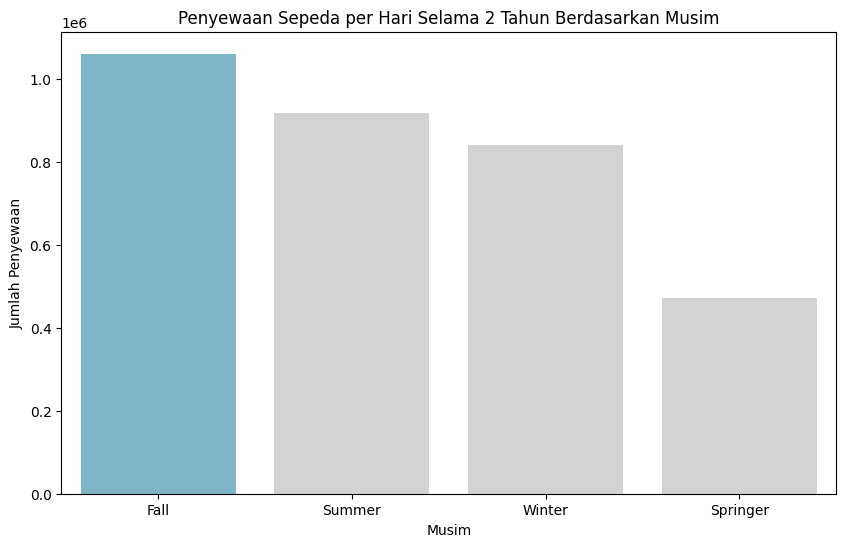

In [74]:
# grafik musim-total rented df_hour
plt.figure(figsize=(10,6))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(data=df_day_season_rented, x='season', y=('total_rented','sum'), palette=colors)
plt.title('Penyewaan Sepeda per Hari Selama 2 Tahun Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan')
plt.show()

<ipython-input-75-3235fad3be89>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_hour_season_rented, x='season', y=('total_rented','sum'), palette=colors)
<ipython-input-75-3235fad3be89>:5: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(data=df_hour_season_rented, x='season', y=('total_rented','sum'), palette=colors)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tupl

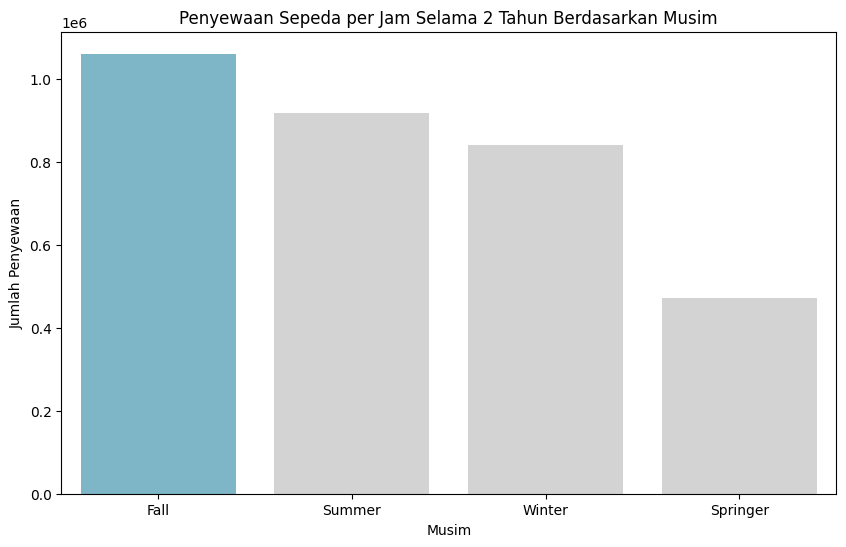

In [75]:
# grafik musim-total rented df_day
plt.figure(figsize=(10,6))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(data=df_hour_season_rented, x='season', y=('total_rented','sum'), palette=colors)
plt.title('Penyewaan Sepeda per Jam Selama 2 Tahun Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan')
plt.show()

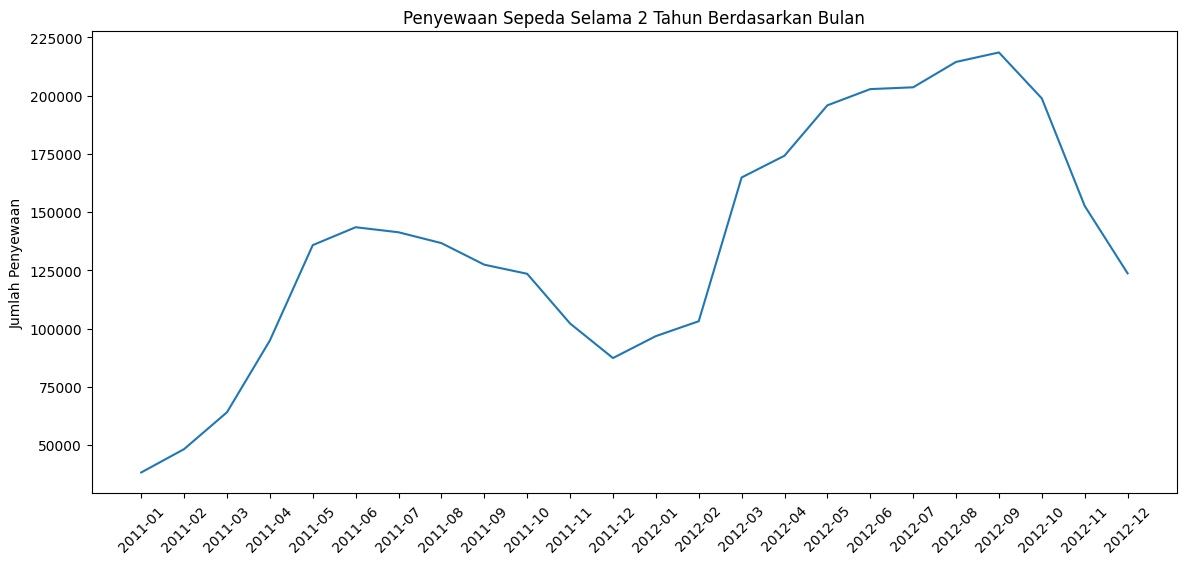

In [76]:
# grafik bulan-total rented df_day
df_sort_month_rented = df_day_month_rented.sort_values(by=['year', 'month'], ascending=True).reset_index(drop=True)
df_sort_month_rented['year'] = df_sort_month_rented['year'].map({
    0: '2011',
    1: '2012'
})
df_sort_month_rented['year_month'] = df_sort_month_rented['year'].astype(str) + '-' + df_sort_month_rented['month'].astype(str).str.zfill(2)

plt.figure(figsize=(14,6))
sns.lineplot(data=df_sort_month_rented,
             x='year_month',
             y=('total_rented', 'sum'))
plt.title('Penyewaan Sepeda Selama 2 Tahun Berdasarkan Bulan')
plt.xlabel('')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(rotation=45)
plt.show()

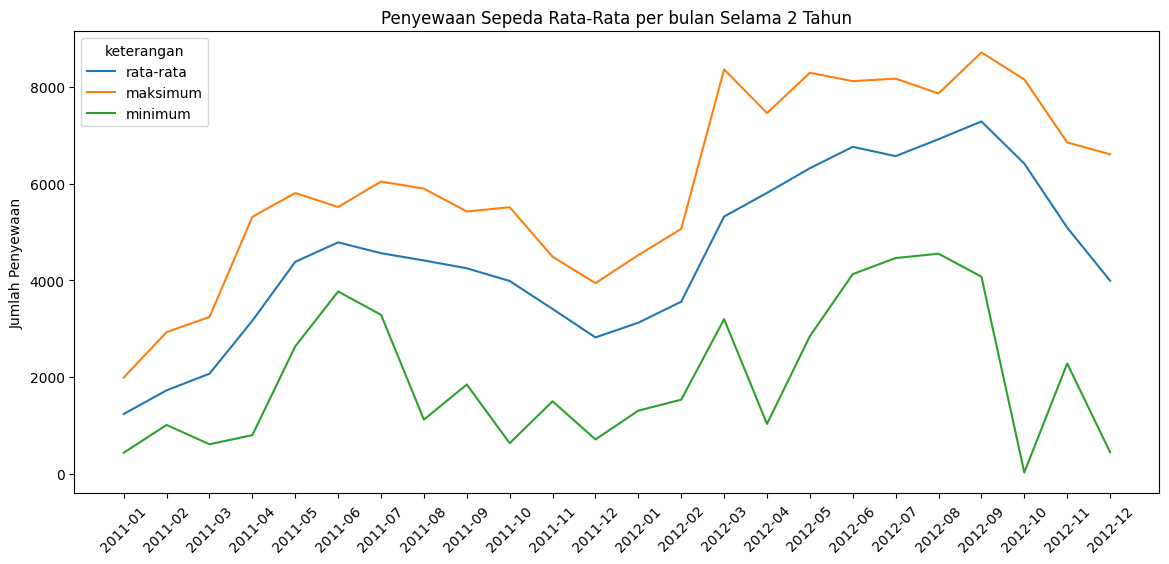

In [77]:
# grafik bulan-total rented df_day
df_sort_month_rented = df_day_month_rented.sort_values(by=['year', 'month'], ascending=True).reset_index(drop=True)
df_sort_month_rented['year'] = df_sort_month_rented['year'].map({
    0: '2011',
    1: '2012'
})
df_sort_month_rented['year_month'] = df_sort_month_rented['year'].astype(str) + '-' + df_sort_month_rented['month'].astype(str).str.zfill(2)

plt.figure(figsize=(14,6))
sns.lineplot(data=df_sort_month_rented,
             x='year_month',
             y=('total_rented', 'mean'),
             label='rata-rata')
sns.lineplot(data=df_sort_month_rented,
             x='year_month',
             y=('total_rented', 'max'),
             label='maksimum')
sns.lineplot(data=df_sort_month_rented,
             x='year_month',
             y=('total_rented', 'min'),
             label='minimum'
             )
plt.title('Penyewaan Sepeda Rata-Rata per bulan Selama 2 Tahun')
plt.xlabel('')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(rotation=45)
plt.legend(title='keterangan')
plt.show()

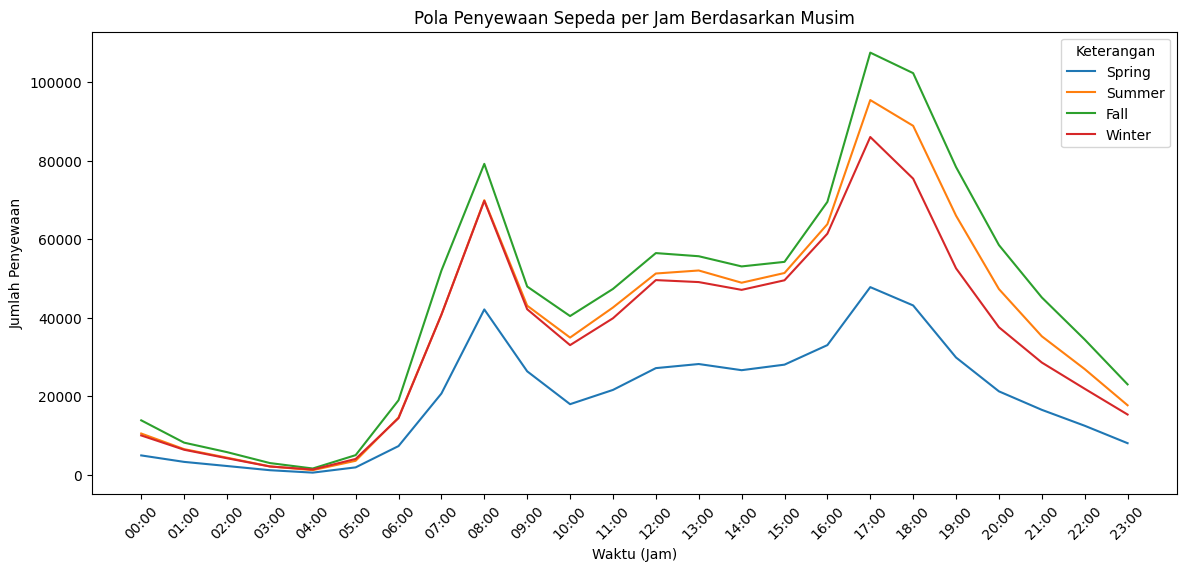

In [78]:
df_sort_hours_season_rented = df_hour_hours_season_rented.sort_values(by='hour', ascending=True).reset_index(drop=True)
df_sort_hours_season_rented['hour'] = df_sort_hours_season_rented['hour'].map({
    0: '00:00', 1: '01:00', 2: '02:00', 3: '03:00', 4: '04:00',
    5: '05:00', 6: '06:00', 7: '07:00', 8: '08:00', 9: '09:00',
    10: '10:00', 11: '11:00', 12: '12:00', 13: '13:00', 14: '14:00',
    15: '15:00', 16: '16:00', 17: '17:00', 18: '18:00', 19: '19:00',
    20: '20:00', 21: '21:00', 22: '22:00', 23: '23:00'
})

plt.figure(figsize=(14,6))

spring_data = df_sort_hours_season_rented[df_sort_hours_season_rented['season'] == 'Springer']
sns.lineplot(data=spring_data,
              x='hour',
              y=('total_rented', 'sum'),
              label='Spring')

summer_data = df_sort_hours_season_rented[df_sort_hours_season_rented['season'] == 'Summer']
sns.lineplot(data=summer_data,
              x='hour',
              y=('total_rented', 'sum'),
              label='Summer')

fall_data = df_sort_hours_season_rented[df_sort_hours_season_rented['season'] == 'Fall']
sns.lineplot(data=fall_data,
              x='hour',
              y=('total_rented', 'sum'),
              label='Fall')

winter_data = df_sort_hours_season_rented[df_sort_hours_season_rented['season'] == 'Winter']
sns.lineplot(data=winter_data,
              x='hour',
              y=('total_rented', 'sum'),
              label='Winter')

plt.title('Pola Penyewaan Sepeda per Jam Berdasarkan Musim')
plt.xlabel('Waktu (Jam)')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(rotation=45)
plt.legend(title='Keterangan')
plt.show()

**Insight:**
- Jumlah sewa sepeda pada musim Fall paling banyak
- Jumlah tertinggi sewa sepeda pada bulan 6 (2011) dan 9 (2012)
- Jumlah sewa sepeda tertinggi pada jam 8 pagi dan 5 sore

### Pertanyaan 2: Pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda

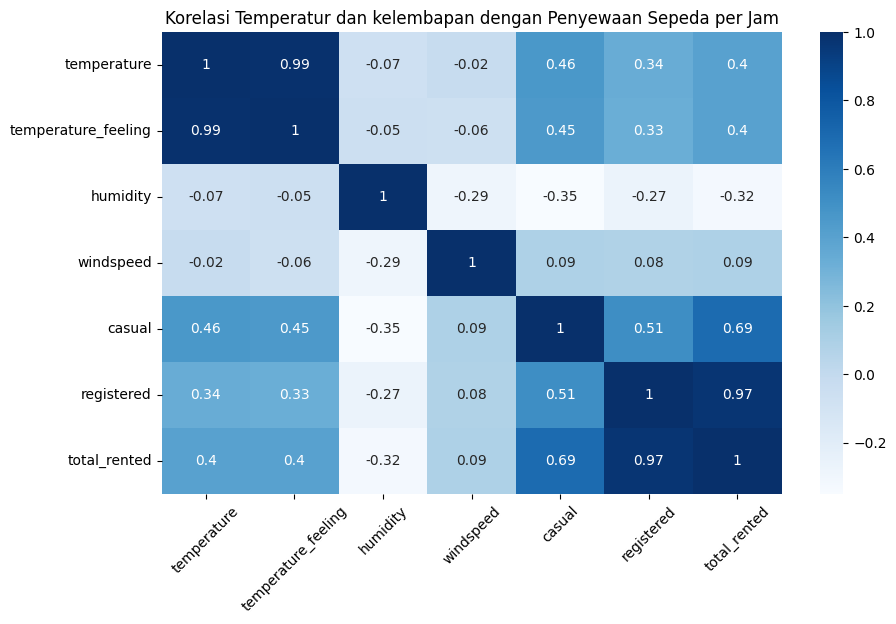

In [79]:
# grafik korelasi antara suhu kelembapan dengan jumlah sewa per jam
labels = df_hour_cor_weather_rented['index']

df_hour_cor_weather_rented_numeric = df_hour_cor_weather_rented.drop(columns='index')

plt.figure(figsize=(10, 6))
sns.heatmap(df_hour_cor_weather_rented_numeric, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xticks(rotation=45)
plt.title('Korelasi Temperatur dan kelembapan dengan Penyewaan Sepeda per Jam')

plt.show()

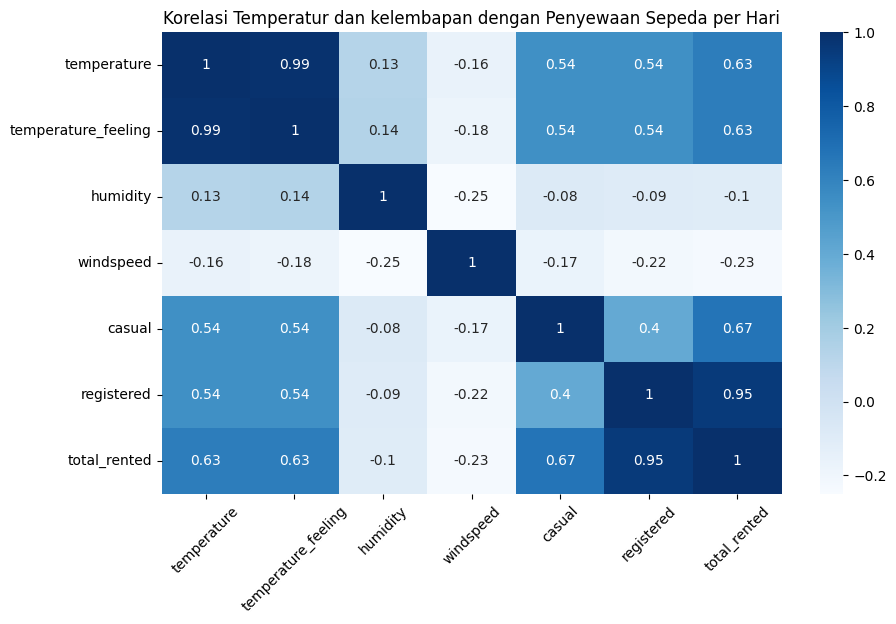

In [80]:
# grafik korelasi antara suhu kelembapan dengan jumlah sewa per hari
labels = df_day_cor_weather_rented['index']

df_day_cor_weather_rented_numeric = df_day_cor_weather_rented.drop(columns='index')

plt.figure(figsize=(10, 6))
sns.heatmap(df_day_cor_weather_rented_numeric, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xticks(rotation=45)
plt.title('Korelasi Temperatur dan kelembapan dengan Penyewaan Sepeda per Hari')

plt.show()

<ipython-input-81-6464ca24b374>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_hour_weather_rented,
<ipython-input-81-6464ca24b374>:9: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(data=df_hour_weather_rented,
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  

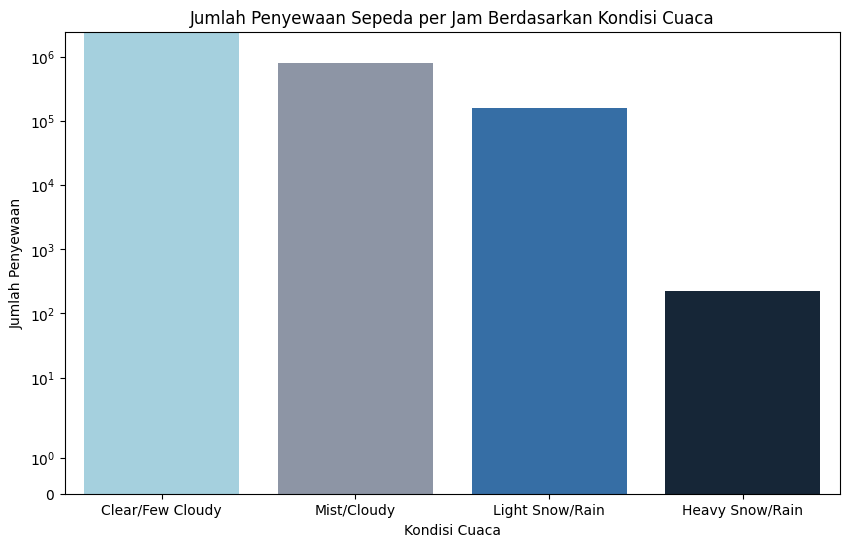

In [81]:
# Grafik Jumlah Sewa per Jam bedasarkan Cuaca
colors = ['#9BD5E8',
          '#8994A9',
          '#236EB8',
          '#10263C',
          '#FFFF00']

plt.figure(figsize=(10,6))
sns.barplot(data=df_hour_weather_rented,
            x='weather_condition',
            y=('total_rented','sum'),
            palette=colors)

plt.title('Jumlah Penyewaan Sepeda per Jam Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Penyewaan')

plt.yscale('symlog')
plt.show()

<ipython-input-82-b55dc9ffcab0>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_day_weather_rented,
<ipython-input-82-b55dc9ffcab0>:9: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(data=df_day_weather_rented,
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  da

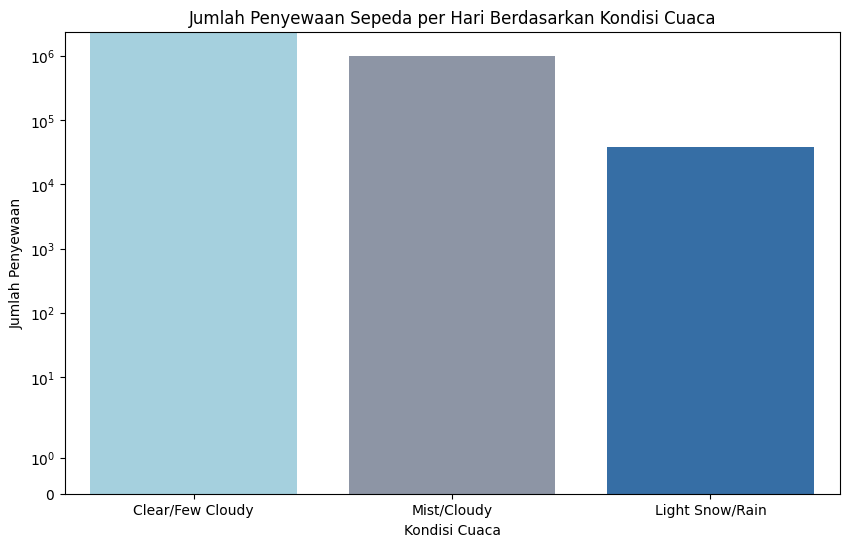

In [82]:
# Grafik Jumlah Sewa per Hari bedasarkan Cuaca
colors = ['#9BD5E8',
          '#8994A9',
          '#236EB8',
          '#10263C',
          '#FFFF00']

plt.figure(figsize=(10,6))
sns.barplot(data=df_day_weather_rented,
            x='weather_condition',
            y=('total_rented','sum'),
            palette=colors)

plt.title('Jumlah Penyewaan Sepeda per Hari Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Penyewaan')

plt.yscale('symlog')
plt.show()

**Insight:**
- Jumlah sewa sepeda memiliki korelasi positif (searah) dengan temperatur, sedangkan jumlah sewa sepeda memiliki kecenderungan korelasi negatif dengan humidity dan windspeed
- Jumlah sewa sepeda pada clear/few cloudy paling banyak dibanding label lain

### Pertanyaan 3: Tren penyewaan sepeda selama hari-hari libur dibandingkan hari kerja

<ipython-input-83-48f6ff9216b6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_day_workday_rented, x='workingday', y=('total_rented','sum'), palette=colors, ax=ax[0])
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
<ipython-input-83-48f6ff9216b6>:11: FutureWarning: 

Passing

Text(0, 0.5, 'Jumlah Penyewaan')

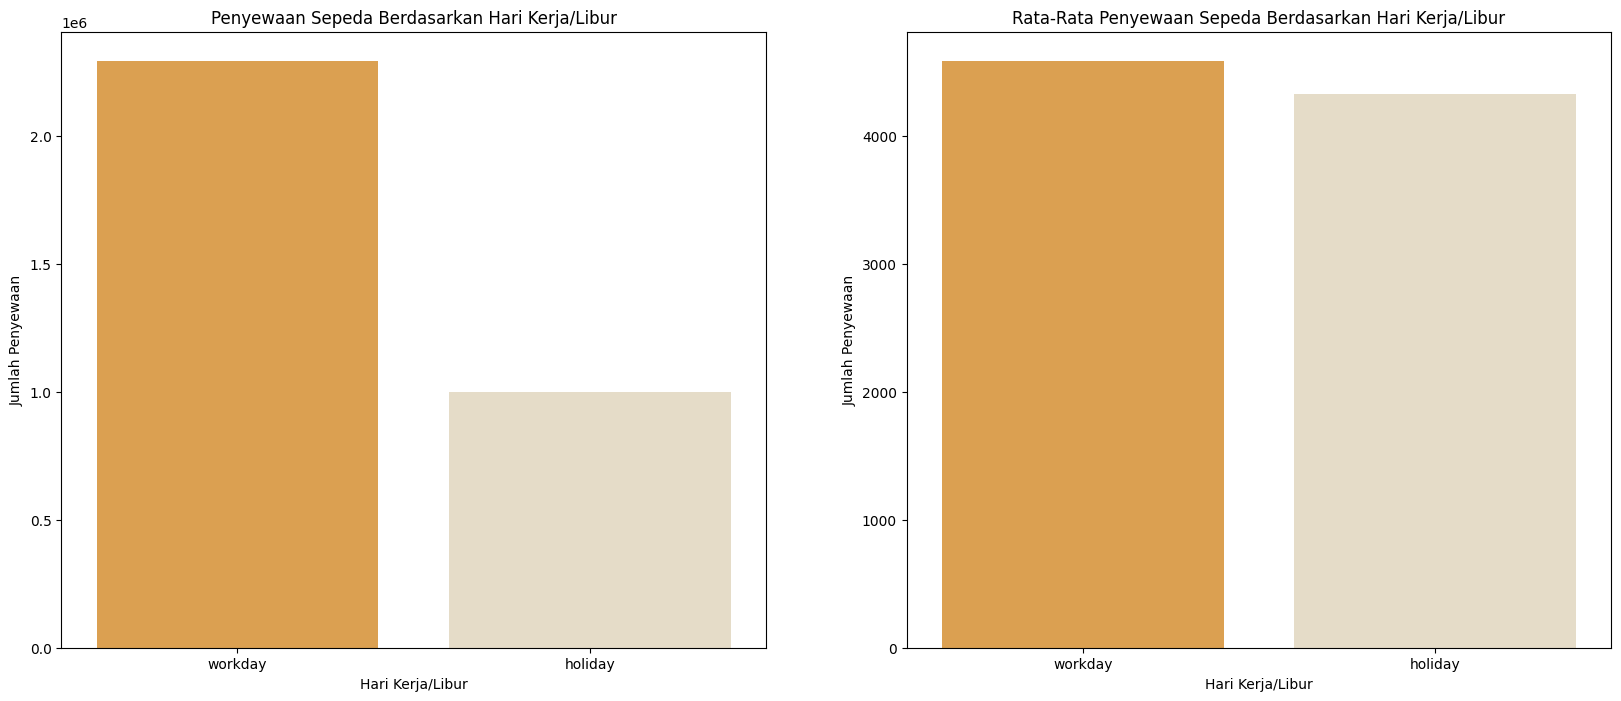

In [83]:
# Grafik perbandingan sewa sepeda per Hari saat Hari Libur dan Kerja
fig, ax = plt.subplots(ncols=2, figsize=(20, 8))
colors = ["#f2a33a", "#eadec3"]

sns.barplot(data=df_day_workday_rented, x='workingday', y=('total_rented','sum'), palette=colors, ax=ax[0])
ax[0].set_title('Penyewaan Sepeda Berdasarkan Hari Kerja/Libur')
ax[0].set_xlabel('Hari Kerja/Libur')
ax[0].set_ylabel('Jumlah Penyewaan')


sns.barplot(data=df_day_workday_rented, x='workingday', y='mean_per_day', palette=colors, ax=ax[1])
ax[1].set_title('Rata-Rata Penyewaan Sepeda Berdasarkan Hari Kerja/Libur')
ax[1].set_xlabel('Hari Kerja/Libur')
ax[1].set_ylabel('Jumlah Penyewaan')

**Insight:**
- Jumlah sewa sepeda workday lebih banyak dibanding holiday

## Analisis Lanjutan (Opsional)

### Binning

In [84]:
# Binning berdasarkan suhu
bins = [0, 0.2, 0.8, 1.0]
labels = ['Dingin', 'Sedang', 'Panas']

df_day['temperature_category'] = pd.cut(df_day['temperature'], bins=bins, labels=labels)

df_day.head(5)

,date,season,year,month,holiday,weekday,workingday,weather_condition,temperature,temperature_feeling,humidity,windspeed,casual,registered,total_rented,temperature_category
0,2011-01-01,Springer,0,1,0,6,0,Mist/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985,Sedang
1,2011-01-02,Springer,0,1,0,0,0,Mist/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801,Sedang
2,2011-01-03,Springer,0,1,0,1,1,Clear/Few Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Dingin
3,2011-01-04,Springer,0,1,0,2,1,Clear/Few Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Dingin
4,2011-01-05,Springer,0,1,0,3,1,Clear/Few Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Sedang


In [85]:
df_temp_cat_day = df_day.groupby(by='temperature_category').agg({
    'total_rented': ['sum','mean','min','max']
}).sort_values(by=('total_rented','sum'), ascending=False).round(2)

df_temp_cat_day

<ipython-input-85-66d5dcb7a3c2>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_temp_cat_day = df_day.groupby(by='temperature_category').agg({


total_rented                     
                              sum     mean   min   max
temperature_category                                  
Sedang                    3163964  4646.06    22  8714
Panas                       76245  4765.31  3285  6786
Dingin                      52470  1543.24   431  3292

<ipython-input-86-c68b55d9c193>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_temp_cat_day, x=df_temp_cat_day.index, y=('total_rented','sum'), palette='pastel')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: Fut

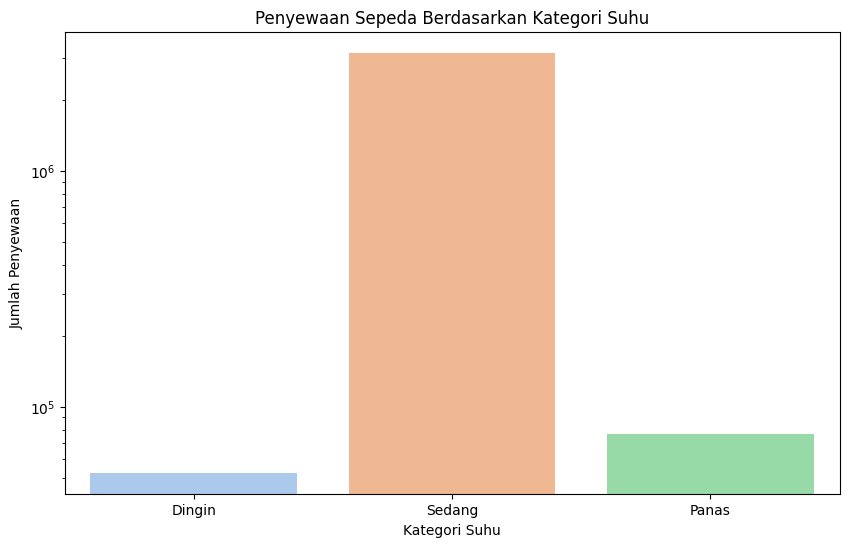

In [86]:
plt.figure(figsize=(10,6))

sns.barplot(data=df_temp_cat_day, x=df_temp_cat_day.index, y=('total_rented','sum'), palette='pastel')
plt.title('Penyewaan Sepeda Berdasarkan Kategori Suhu')
plt.xlabel('Kategori Suhu')
plt.ylabel('Jumlah Penyewaan')
plt.yscale('log')
plt.show()

**Insight**
- Bining tersebut bertujuan untuk mengelompokkan data suhu menjadi beberapa kategori yang lebih mudah dipahami
- Dapat disimpulkan bahwa penyewa cenderung menyewa sepeda saat suhu sedang

## Conclusion

### Conclusion pertanyaan 1: Bagaimana pola penggunaan sepeda selama satu tahun?



Pola tren sewa sepeda dapat dilihat dari grafik tren sewa sepeda tiap musim, tren tiap sepeda tiap bulan, serta tren sewa sepeda perjamnya yang akan dibandingkan tiap musim.
- Tren sewa sepeda paling tinggi terjadi pada ***Musim Gugur***. Dimana hal ini juga terlihat bahwa titik penyewaan tertinggi tiap bulannya terjadi pada bulan 6 pada 2011 dan bulan 9 pada 2012 yang mana keduanya merupakan musim gugur.
- Jam penyewaan sepeda tertinggi memiliki kesamaan tiap musimnya. Dua titik sewa tertinggi terjadi pada ***jam 8 pagi*** dan jam 17 atau ***jam 5 sore***

### Conclusion pertanyaan 2: Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?

Kondisi cuaca dapat memengaruhi jumlah sewa sepeda pada suatu waktu. Tingkat penyewaan sepeda dapat terlihat pada grafik korelasi serta perbandingan jumlah sewa tiap jenis cuaca.
- Jumlah sewa sepeda memiliki korelasi positif (searah) dengan temperatur, sedangkan jumlah sewa sepeda memiliki kecenderungan korelasi negatif dengan humidity dan windspeed.
- Sepeda paling banyak dipinjam pada saat cuaca cerah atau sedikit berawan. Semakin buruk cuacanya, maka semakin sedikit jumlah peminjaman.

### Conclusion pertanyaan 3: Bagaimana tren penyewaan sepeda selama hari-hari libur dibandingkan hari kerja?

Perbandingan jumlah sewa sepeda saat hari libur dan hari kerja maka dapat ditemukan perbedaan. Hari ***Kerja memiliki*** tingkat sewa yang lebih tinggi dari Hari Libur. Hal ini mungkin berhubungan dengan waktu (jam) tertinggi penyewaan pada jam 8 pagi dan jam 5 sore yang mana hal tersebut merupakan rata rata jam berangkat dan pulang kerja.